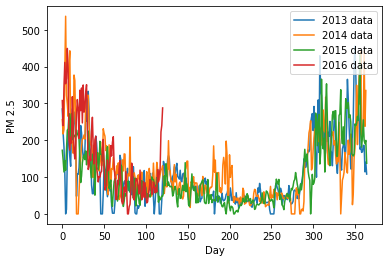

In [2]:
import matplotlib.pyplot as plt
import os
import time
import requests
import sys
import pandas as pd
import numpy as np


def avg_data_2013():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2013.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2014():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2014.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2015():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2015.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average

    
def avg_data_2016():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2016.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    

if __name__=="__main__":
    lst2013=avg_data_2013()
    lst2014=avg_data_2014()
    lst2015=avg_data_2015()
    lst2016=avg_data_2016()
    plt.plot(range(0,365),lst2013,label="2013 data")
    plt.plot(range(0,364),lst2014,label="2014 data")
    plt.plot(range(0,365),lst2015,label="2015 data")
    plt.plot(range(0,121),lst2016,label="2016 data")
    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.legend(loc='upper right')
    plt.show()

In [4]:
import csv
from bs4 import BeautifulSoup

In [5]:
def met_data(month, year):
    
    file_html = open('C:/Everything/Data/Html_data/{}/{}.html'.format(year, month), 'rb')
    plain_text = file_html.read()
    #print(plain_text)
    
    tempD = []
    finalD = []
    
    soup = BeautifulSoup(plain_text, "lxml")
    #print(soup)
    
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)
                #print(tempD)
                
    rows = len(tempD) / 15
    #print(rows)
    
    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)
    #print(finalD)
    
    length = len(finalD)
    #print(length)
    
    finalD.pop(length - 1)
    finalD.pop(0)
    
    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)
    
    #print(finalD)
    return finalD

def data_combine(year, cs):
    for a in pd.read_csv('C:/Everything/Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

if __name__ == "__main__":
    if not os.path.exists("C:/Everything/Data/Real-Data"):
        os.makedirs("C:/Everything/Data/Real-Data")
    for year in range(2013, 2017):
        final_data = []
        
        with open('C:/Everything/Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T','TM','Tm','SLP','H','VV','V','VM','PM 2.5'])
            
        for month in range(1, 13):
            if year == 2016:
                if month < 5:
                    temp = met_data(month, year)
                    final_data = final_data + temp
                else:
                    break
            else:
                temp = met_data(month, year)
                final_data = final_data + temp
            
        
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()
        #pm
        #print(pm)
        
        if len(pm) == 364:
            pm.insert(364, '-')
        #print(pm)   
        
        for i in range(len(final_data)-1):
            final_data[i].insert(8, pm[i])
        #print(final_data)  
            
        with open('C:/Everything/Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                wr.writerow(row)
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                if flag != 1:
                    wr.writerow(row)
    #print(wr)
    data_2013 = data_combine(2013, 600)
    #print(data_2013)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    data_2016 = data_combine(2016, 600)
    
    total = data_2013+data_2014+data_2015+data_2016
    #total.dropna()
    #print(total)
    with open('C:/Everything/Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T','TM','Tm','SLP','H','VV','V','VM','PM 2.5'])
        wr.writerows(total)